# Import what we need

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load MNIST Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

### check shapes and types

In [3]:
type(train_data), train_data.dtype, train_data.shape

(numpy.ndarray, dtype('uint8'), (60000, 28, 28))

In [4]:
train_labels[1:7]

array([0, 4, 1, 9, 2, 1], dtype=uint8)

In [5]:
type(train_labels), train_labels.dtype, train_labels.shape

(numpy.ndarray, dtype('uint8'), (60000,))

### check shapes and types of test data

In [6]:
type(test_data), test_data.dtype, test_data.shape

(numpy.ndarray, dtype('uint8'), (10000, 28, 28))

In [7]:
type(test_labels), test_labels.dtype, test_labels.shape

(numpy.ndarray, dtype('uint8'), (10000,))

### now lets plot some images

In [8]:
train_labels[1]

0

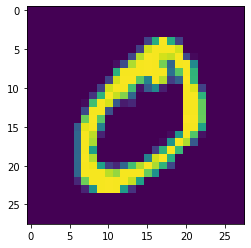

In [9]:
plt.imshow(train_data[1])

In [10]:
train_labels[0]

5

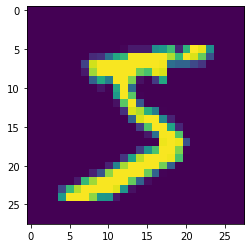

In [11]:
plt.imshow(train_data[0])

# Reshape train and test data

In [12]:
train_data = np.reshape(train_data, newshape=(-1, 28 * 28))
train_data.shape, train_data.dtype

((60000, 784), dtype('uint8'))

In [13]:
test_data = np.reshape(test_data, newshape=(-1, 28 * 28))
test_data.shape, test_data.dtype

((10000, 784), dtype('uint8'))

# Convert labels to one-hot encoding
### essential for classification - use to_categorical

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
train_labels = to_categorical(train_labels, num_classes=10 )

train_labels.shape, train_labels.dtype

((60000, 10), dtype('float32'))

In [16]:
test_labels = to_categorical(test_labels, num_classes=10)
test_labels.shape, test_labels.dtype

((10000, 10), dtype('float32'))

### now see new one-hot labels

In [17]:
train_labels[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Normalize the data
### between 0 and 1 and float32 dtype

In [18]:
train_data = train_data.astype('float32') / 255.0
train_data.shape, train_data.dtype

((60000, 784), dtype('float32'))

In [19]:
test_data = test_data.astype('float32') / 255.0
test_data.shape, test_data.dtype

((10000, 784), dtype('float32'))

### check mean, min, max of data

In [20]:
train_data.mean()

0.13066062

In [21]:
test_data.mean()

0.13251467

## last final check of all shapes

In [22]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

## Use some portion of data if you want

In [23]:
train_data = train_data[:10000]
train_labels = train_labels[:10000]
train_data.shape, train_labels.shape

((10000, 784), (10000, 10))

# Create Our Classification Model

### Import layers and models

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

## Create the model

In [25]:
input_layer = Input(shape=(784,))
x = Dense(units=512, activation='relu')(input_layer)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
predictions = Dense(units=10, activation='softmax')(x)

my_first_classifier_model = Model(inputs=input_layer, outputs=predictions)

### print summary of the model

In [26]:
my_first_classifier_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# Compile the model
## With optimizer and loss function
## This time we use another metric as well

In [27]:
from tensorflow.keras.optimizers import SGD, Adam
my_first_classifier_model.compile(optimizer=Adam(learning_rate=0.0001),
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

## Now we can train the model

In [ ]:
my_first_classifier_model.fit(x=train_data, y=train_labels,
                              batch_size=32, epochs=50, shuffle=True,
                              validation_data=(test_data, test_labels))


Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 1.4201 - accuracy: 0.6169 - val_loss: 0.3663 - val_accuracy: 0.9037
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3098 - accuracy: 0.9195 - val_loss: 0.2872 - val_accuracy: 0.9190
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 0.2194 - accuracy: 0.9403 - val_loss: 0.2348 - val_accuracy: 0.9338
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.1704 - accuracy: 0.9537 - val_loss: 0.2097 - val_accuracy: 0.9414
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 0.1358 - accuracy: 0.9630 - val_loss: 0.1914 - val_accuracy: 0.9433
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.1175 - accuracy: 0.9682 - val_loss: 0.1907 - val_accuracy: 0.9431
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0863 - accuracy: 0.9791 - val_loss: 0.1750 - val_accuracy: 0.9483
Epoch 

### plot model loss history

In [ ]:
model_loss_history = pd.DataFrame({'loss': my_first_classifier_model.history.history['loss'],
                             'val_loss': my_first_classifier_model.history.history['val_loss']})

In [ ]:
model_loss_history.plot()

### min of validation loss

In [ ]:
model_loss_history['val_loss'].min()

### plot model accuracy history

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': my_first_classifier_model.history.history['accuracy'],
                                       'val_accuracy': my_first_classifier_model.history.history['val_accuracy']})

In [ ]:
model_accuracy_history.plot()

### max of validation accuracy

In [ ]:
model_accuracy_history['val_accuracy'].max()

## Evaluate the model

In [ ]:
my_first_classifier_model.evaluate(x=test_data, y=test_labels)

# Create Another Model with Dropout Layer

## Import Dropout layer

In [ ]:
from tensorflow.keras.layers import Dropout

## Create second model with Dropout

In [ ]:
input_layer = Input(shape=(784,))
x = Dense(units=512, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(units=10, activation='softmax')(x)

my_second_classifier_model = Model(inputs=input_layer, outputs=predictions)

### print summary of the model

In [ ]:
my_second_classifier_model.summary()

## Compile the model with optimizer, loss function and accuracy metric

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
my_second_classifier_model.compile(optimizer=Adam(learning_rate=0.0001),
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

## Now we can train our model

In [ ]:
my_second_classifier_model.fit(x=train_data, y=train_labels,
                              batch_size=32, epochs=50, shuffle=True,
                              validation_data=(test_data, test_labels))

### Plot model loss history

In [ ]:
model_loss_history = pd.DataFrame({'loss': my_second_classifier_model.history.history['loss'],
                                   'val_loss': my_second_classifier_model.history.history['val_loss']})

In [ ]:
model_loss_history.plot()

### min of model validation loss history

In [ ]:
model_loss_history['val_loss'].min()

### plot model accuracy history

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': my_second_classifier_model.history.history['accuracy'],
                                       'val_accuracy': my_second_classifier_model.history.history['val_accuracy']})

In [ ]:
model_accuracy_history.plot()

### max of model validation accuracy

In [ ]:
model_accuracy_history['val_accuracy'].max()

## Evaluate the model

In [ ]:
my_second_classifier_model.evaluate(x=test_data, y=test_labels)